In [50]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch
from highlight_text import ax_text, fig_text
from collections import Counter

from highlight_text import ax_text
from PIL import Image
from mplsoccer import add_image
import matplotlib.ticker as ticker
import urllib
from urllib.request import urlopen

from sklearn.cluster import KMeans
import matplotlib.patches as patches

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("D:\FData\LaLiga_2023-24\GW1_to_GW_38combinded.csv")

# For

In [55]:
def plot_blank(ax):
    pitch = VerticalPitch(pitch_type='uefa', pitch_color='#f5f5f5', line_color='#f5f5f5', spot_type='square', linewidth=2, half=True, corner_arcs=True)
    pitch.draw(ax=ax)
    ax.set_ylim(52.35)
    ax.set_xlim(-0.5, 68.5)

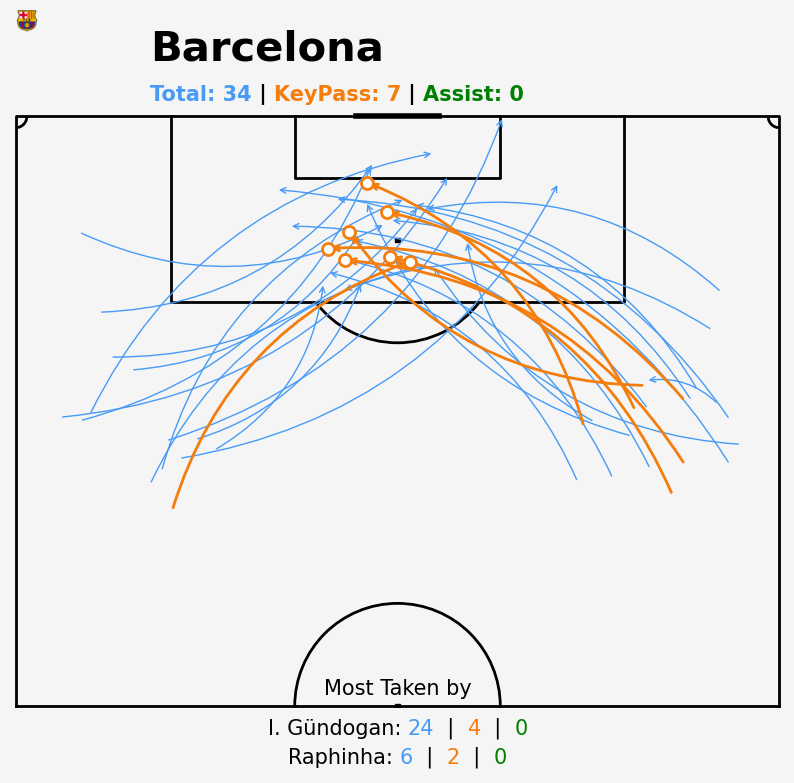

In [123]:
def plot_indirect_freekick(ax, team_name):
    df_team = df[(df['teamName'] == team_name) & (df['type'] == 'Pass') & (df['x'] >= 52.5) & (df['qualifiers'].str.contains('Chipped')) & 
                 (df['qualifiers'].str.contains('FreekickTaken')) & (df['qualifiers'].str.contains('RightFoot|LeftFoot'))]
    df_right = df_team[df_team['qualifiers'].str.contains('RightFoot')]
    df_left = df_team[df_team['qualifiers'].str.contains('LeftFoot')]
    
    df_kp = df_team[df_team['qualifiers'].str.contains('KeyPass')]
    df_as = df_team[df_team['qualifiers'].str.contains('IntentionalGoalAssist')]
    
    # Create a pitch
    pitch = VerticalPitch(pitch_type='uefa', pitch_color='#f5f5f5', line_color='k', spot_type='square', linewidth=2, half=True, corner_arcs=True)
    pitch.draw(ax=ax)
    ax.set_ylim(52.35)
    ax.set_xlim(-0.5, 68.5)
    ax.invert_xaxis()
    
    player_nrml = []
    player_kp = []
    player_as = []
    # Plot arrows for each indirect free kick
    for _, row in df_right.iterrows():
        if 'KeyPass' in row['qualifiers']:
            player_kp.append(row['shortName'])
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  
                        arrowprops=dict(arrowstyle="->", color="#f57d0c", linewidth=2, zorder=3, connectionstyle="arc3,rad=0.25"))
            
        if 'IntentionalGoalAssist' in row['qualifiers']:
            player_as.append(row['shortName'])
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  
                        arrowprops=dict(arrowstyle="->", color="g", linewidth=4, zorder=4, connectionstyle="arc3,rad=0.25"))

        else:
            player_nrml.append(row['shortName'])
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  zorder=1,
                        arrowprops=dict(arrowstyle="->", color="#479bf5", linewidth=1, connectionstyle="arc3,rad=0.25"))

    # Plot arrows for each indirect free kick
    for _, row in df_left.iterrows():
        if 'KeyPass' in row['qualifiers']:
            player_kp.append(row['shortName'])
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  
                        arrowprops=dict(arrowstyle="->", color="#f57d0c", linewidth=2, zorder=3, connectionstyle="arc3,rad=-0.25"))
            
        if 'IntentionalGoalAssist' in row['qualifiers']:
            player_as.append(row['shortName'])
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  
                        arrowprops=dict(arrowstyle="->", color="g", linewidth=4, zorder=4, connectionstyle="arc3,rad=-0.25"))

        else:
            player_nrml.append(row['shortName'])
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  zorder=1,
                        arrowprops=dict(arrowstyle="->", color="#479bf5", linewidth=1, connectionstyle="arc3,rad=-0.25"))

    
    rkp_sc = pitch.scatter(df_kp.endX, df_kp.endY, s=75, c='w', edgecolors='#f57d0c', linewidths=2, zorder=3, ax=ax)
    ras_sc = pitch.scatter(df_as.endX, df_as.endY, s=100, c='w', edgecolors='g', marker='football', linewidths=2, zorder=3, ax=ax)

    ax.text(56, 111, f'{team_name}', fontsize=30, fontweight='bold', ha='left', va='center')
    # Take data coordinates and transform them to normalized figure coordinates
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((68,107))
    ax_size = 0.022
    image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    fotmob_url = f'https://raw.githubusercontent.com/adnaaan433/club_teams_logos/main/{team_name}.png'
    fotmob_url = fotmob_url.replace(' ', '%20')
    club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    image_ax.imshow(club_icon)
    image_ax.axis('off')

    ax_text(56, 107, s=f'<Total: {len(df_team)}> | <KeyPass: {len(df_kp)}> | <Assist: {len(df_as)}>', 
            color='k', fontsize=15, fontweight='bold', highlight_textprops=[{"color":"#479bf5"}, {"color":"#f57d0c"}, {"color":"g"}],
            va = "center", ha = "left", ax=ax)

    # Count occurrences of each player in the lists
    count_nrml = Counter(player_nrml)
    count_kp = Counter(player_kp)
    count_as = Counter(player_as)

    # Create a DataFrame
    players = list(set(player_nrml + player_kp + player_as))
    data = {
        'player': players,
        'normal': [count_nrml[player] for player in players],
        'keypass': [count_kp[player] for player in players],
        'assist': [count_as[player] for player in players]
    }
    df_counts = pd.DataFrame(data)
    df_counts['total'] = df_counts['normal'] + df_counts['keypass'] + df_counts['assist']
    df_counts[['normal','keypass','assist','total']] = df_counts[['normal','keypass','assist','total']].astype(int)
    df_counts = df_counts.sort_values(by='total', ascending=False).reset_index(drop=True)

    ax.text(34, 54, 'Most Taken by', fontsize=15, va="center", ha="center")
    ax_text(34, 50.5, s=f"{df_counts['player'][0]}: <{df_counts['normal'][0]}>  |  <{df_counts['keypass'][0]}>  |  <{df_counts['assist'][0]}>",
            color='k', fontsize=15, 
            highlight_textprops=[{"color":"#479bf5"}, {"color":"#f57d0c"}, {"color":"g"}],
            va = "center", ha = "center", ax=ax)
    ax_text(34, 48, s=f"{df_counts['player'][1]}: <{df_counts['normal'][1]}>  |  <{df_counts['keypass'][1]}>  |  <{df_counts['assist'][1]}>",
            color='k', fontsize=15, 
            highlight_textprops=[{"color":"#479bf5"}, {"color":"#f57d0c"}, {"color":"g"}],
            va = "center", ha = "center", ax=ax)
    
    return

fig, ax = plt.subplots(figsize=(10, 10), facecolor='#f5f5f5')
plot_indirect_freekick(ax, 'Barcelona')
plt.show()

Execution Time: 31.323097944259644 seconds


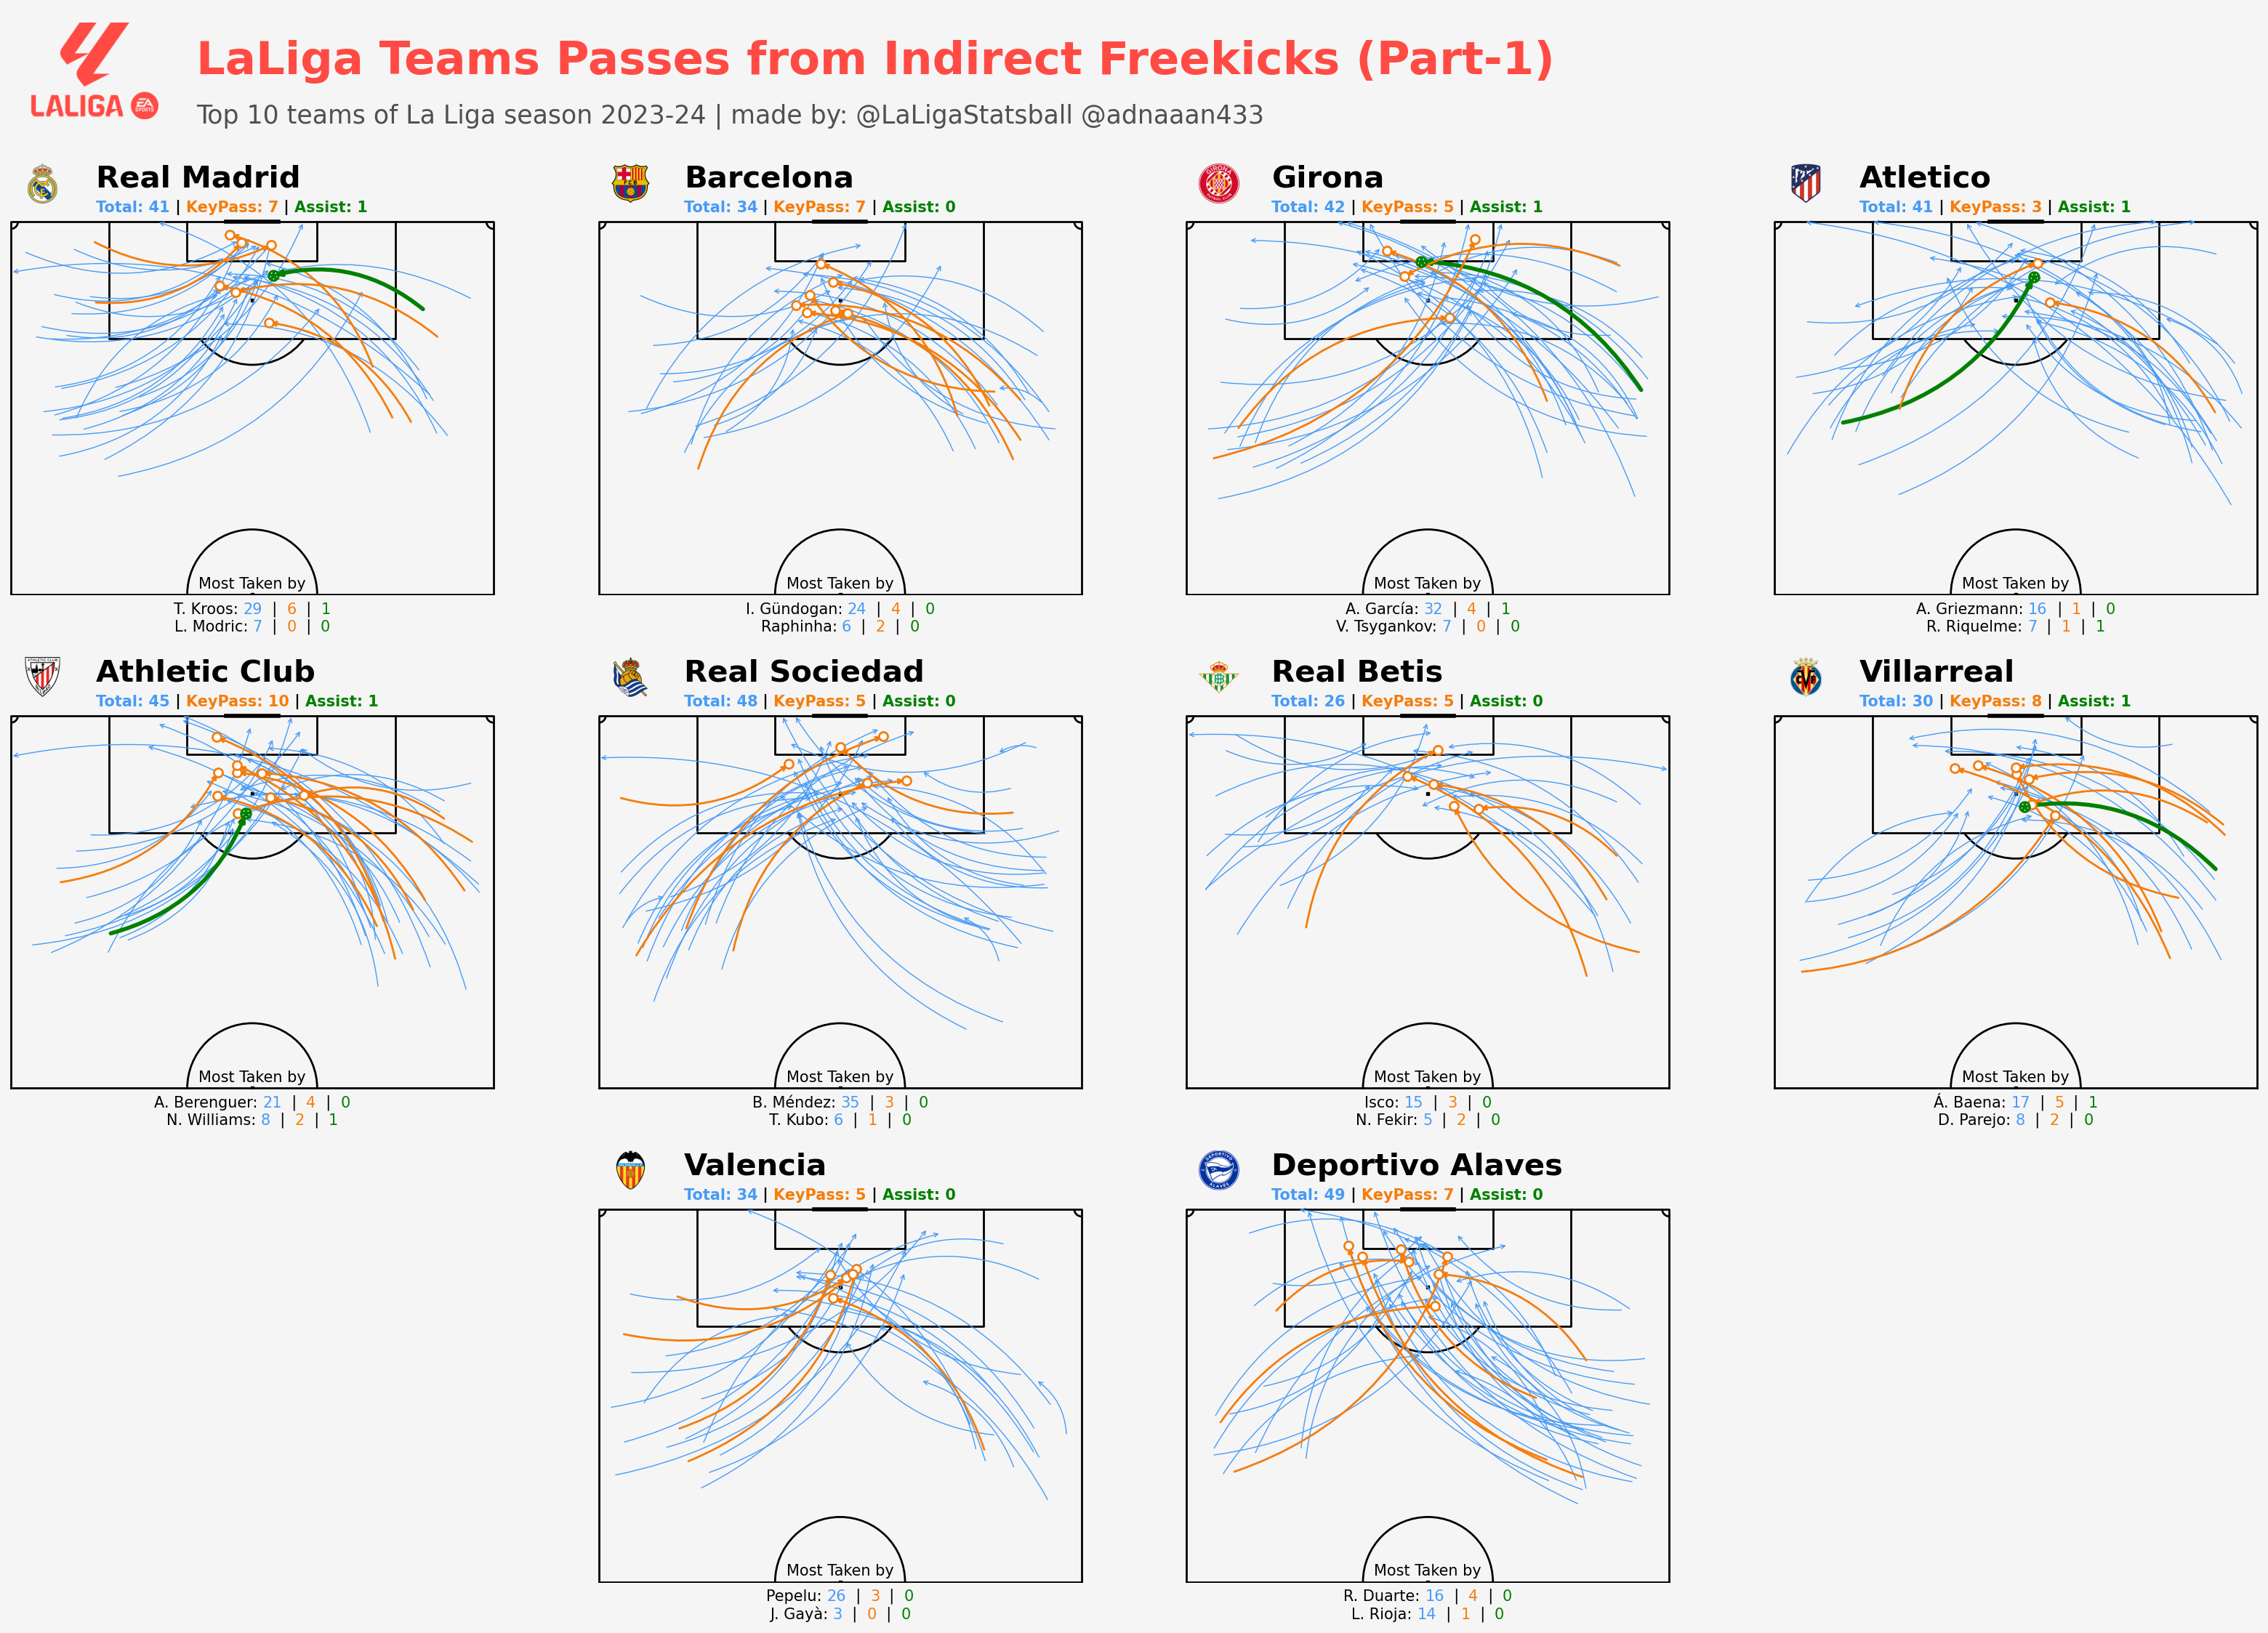

In [109]:
start_time = time.time()
fig, axs = plt.subplots(3, 4, figsize=(40, 25), facecolor='#f5f5f5', dpi=100)
axs = axs.flatten()

# List of team names
team_names = ['Real Madrid', 'Barcelona', 'Girona', 'Atletico', 'Athletic Club', 'Real Sociedad', 'Real Betis', 'Villarreal']

for i, team_name in enumerate(team_names):
    plot_indirect_freekick(axs[i], team_name)

plot_blank(axs[8])
plot_indirect_freekick(axs[9], 'Valencia')
plot_indirect_freekick(axs[10], 'Deportivo Alaves')
plot_blank(axs[11])

fig.text(0.19, 0.95, 'LaLiga Teams Passes from Indirect Freekicks (Part-1)', color='#ff4b44', fontweight='bold', fontsize=45, ha='left', va='center')
fig.text(0.19, 0.92, 'Top 10 teams of La Liga season 2023-24 | made by: @LaLigaStatsball @adnaaan433', color='#505050', fontsize=25, ha='left', va='center')

image_url = 'https://raw.githubusercontent.com/adnaaan433/league_logos/main/LaLiga.png'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.12, bottom=0.91, width=0.07, height=0.07)



# plt.tight_layout()
end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

Execution Time: 31.571834802627563 seconds


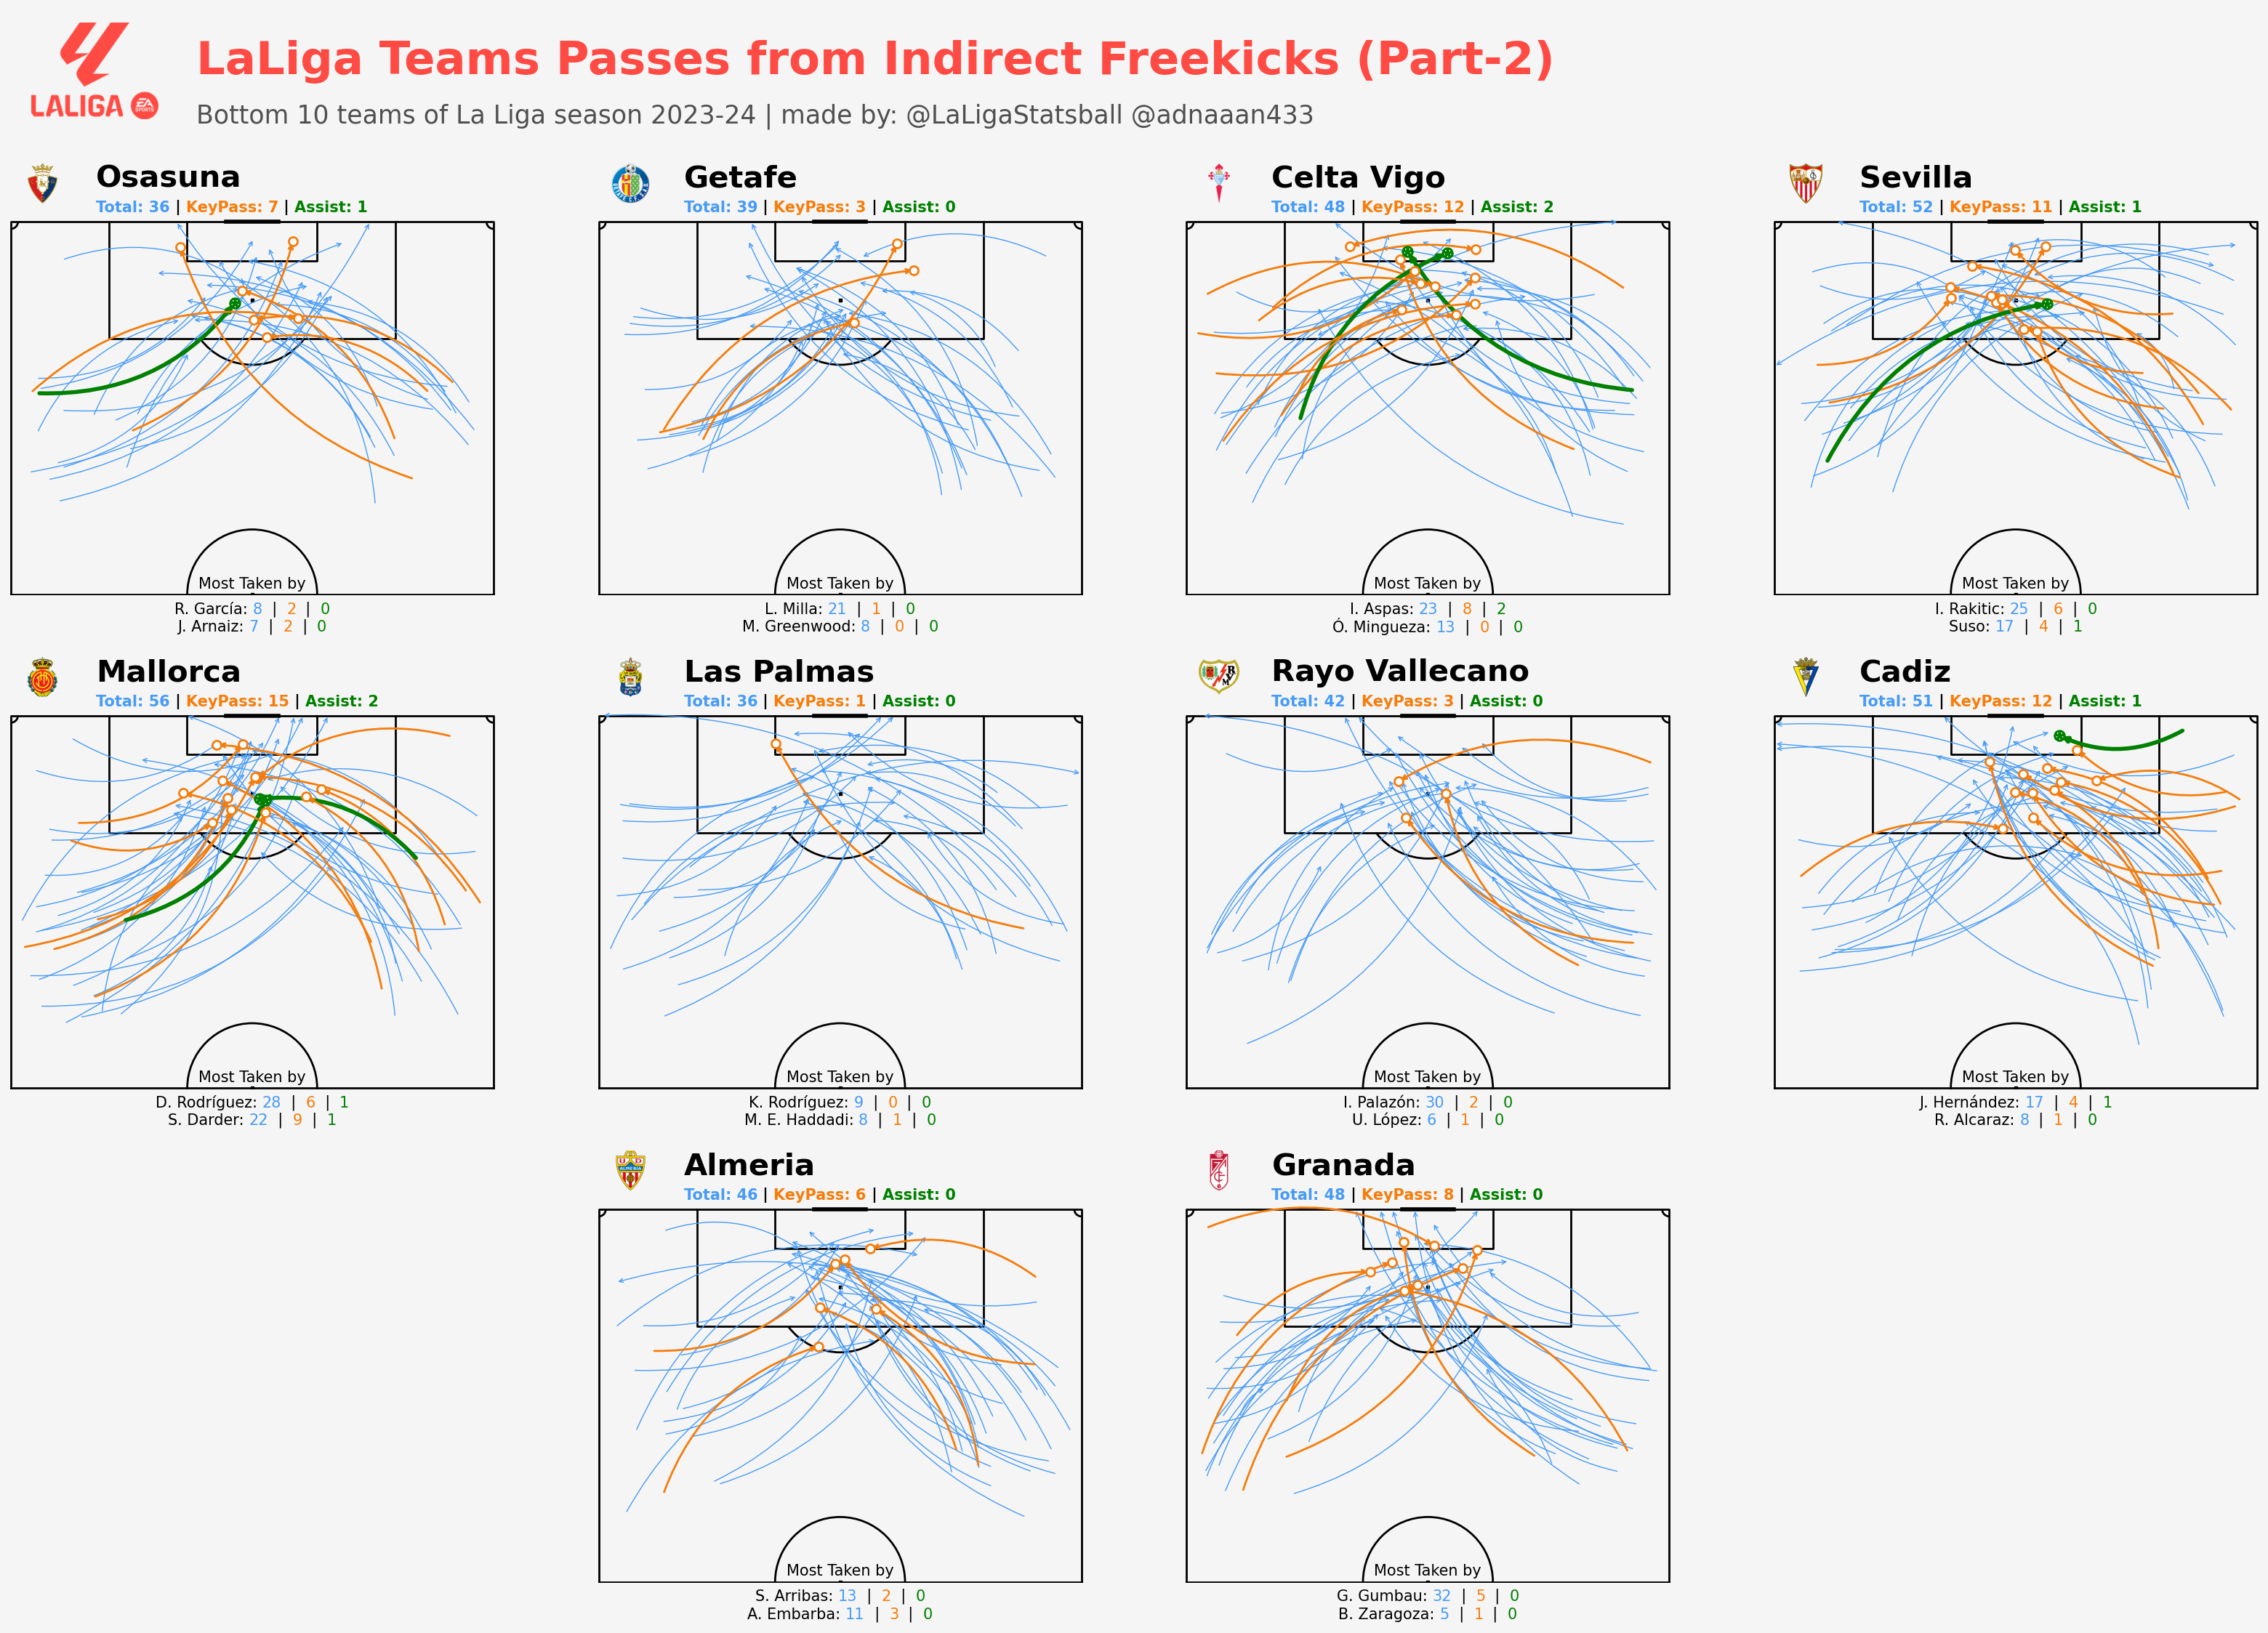

In [114]:
start_time = time.time()
fig, axs = plt.subplots(3, 4, figsize=(40, 25), facecolor='#f5f5f5', dpi=100)
axs = axs.flatten()

# List of team names
team_names = ['Osasuna', 'Getafe', 'Celta Vigo', 'Sevilla', 'Mallorca', 'Las Palmas', 
              'Rayo Vallecano', 'Cadiz']

for i, team_name in enumerate(team_names):
    plot_indirect_freekick(axs[i], team_name)

plot_blank(axs[8])
plot_indirect_freekick(axs[9], 'Almeria')
plot_indirect_freekick(axs[10], 'Granada')
plot_blank(axs[11])

fig.text(0.19, 0.95, 'LaLiga Teams Passes from Indirect Freekicks (Part-2)', color='#ff4b44', fontweight='bold', fontsize=45, ha='left', va='center')
fig.text(0.19, 0.92, 'Bottom 10 teams of La Liga season 2023-24 | made by: @LaLigaStatsball @adnaaan433', color='#505050', fontsize=25, ha='left', va='center')

image_url = 'https://raw.githubusercontent.com/adnaaan433/league_logos/main/LaLiga.png'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.12, bottom=0.91, width=0.07, height=0.07)



# plt.tight_layout()
end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

# Against

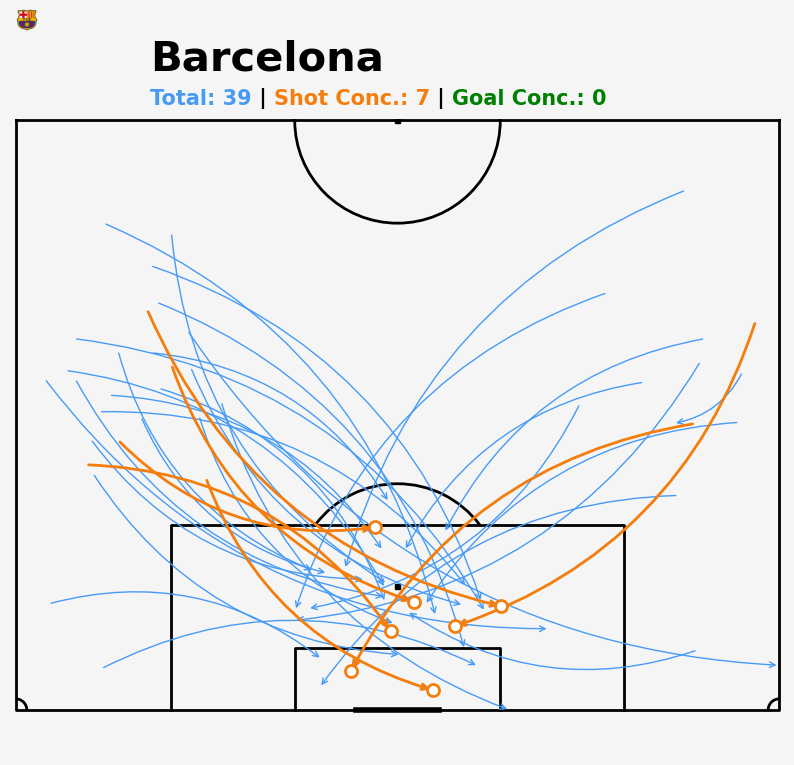

In [130]:
def plot_indirect_freekick_against(ax, team_name):
    df_team = df[(df['oppositionTeamName'] == team_name) & (df['type'] == 'Pass') & (df['x'] >= 52.5) & (df['qualifiers'].str.contains('Chipped')) & 
                 (df['qualifiers'].str.contains('FreekickTaken')) & (df['qualifiers'].str.contains('RightFoot|LeftFoot'))]
    df_right = df_team[df_team['qualifiers'].str.contains('RightFoot')]
    df_left = df_team[df_team['qualifiers'].str.contains('LeftFoot')]
    
    df_kp = df_team[df_team['qualifiers'].str.contains('KeyPass')]
    df_as = df_team[df_team['qualifiers'].str.contains('IntentionalGoalAssist')]
    
    # Create a pitch
    pitch = VerticalPitch(pitch_type='uefa', pitch_color='#f5f5f5', line_color='k', spot_type='square', linewidth=2, half=True, corner_arcs=True)
    pitch.draw(ax=ax)
    ax.set_ylim(52.35)
    ax.set_xlim(-0.5, 68.5)
    
    # Plot arrows for each indirect free kick
    for _, row in df_right.iterrows():
        if 'KeyPass' in row['qualifiers']:
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  
                        arrowprops=dict(arrowstyle="->", color="#f57d0c", linewidth=2, zorder=3, connectionstyle="arc3,rad=0.25"))
            
        if 'IntentionalGoalAssist' in row['qualifiers']:
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  
                        arrowprops=dict(arrowstyle="->", color="g", linewidth=4, zorder=4, connectionstyle="arc3,rad=0.25"))

        else:
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  zorder=1,
                        arrowprops=dict(arrowstyle="->", color="#479bf5", linewidth=1, connectionstyle="arc3,rad=0.25"))

    # Plot arrows for each indirect free kick
    for _, row in df_left.iterrows():
        if 'KeyPass' in row['qualifiers']:
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  
                        arrowprops=dict(arrowstyle="->", color="#f57d0c", linewidth=2, zorder=3, connectionstyle="arc3,rad=-0.25"))
            
        if 'IntentionalGoalAssist' in row['qualifiers']:
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  
                        arrowprops=dict(arrowstyle="->", color="g", linewidth=4, zorder=4, connectionstyle="arc3,rad=-0.25"))

        else:
            start_point = (row['y'], row['x'])
            end_point = (row['endY'], row['endX'])
        
            ax.annotate("", xy=end_point, xytext=start_point, textcoords="data",  zorder=1,
                        arrowprops=dict(arrowstyle="->", color="#479bf5", linewidth=1, connectionstyle="arc3,rad=-0.25"))

    
    rkp_sc = pitch.scatter(df_kp.endX, df_kp.endY, s=75, c='w', edgecolors='#f57d0c', linewidths=2, zorder=3, ax=ax)
    ras_sc = pitch.scatter(df_as.endX, df_as.endY, s=100, c='w', edgecolors='g', marker='football', linewidths=2, zorder=3, ax=ax)

    ax.text(12, 47, f'{team_name}', fontsize=30, fontweight='bold', ha='left', va='center')
    # Take data coordinates and transform them to normalized figure coordinates
    DC_to_FC = ax.transData.transform
    FC_to_NFC = fig.transFigure.inverted().transform
    DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
    ax_coords = DC_to_NFC((0,110.5))
    ax_size = 0.022
    image_ax = fig.add_axes([ax_coords[0], ax_coords[1], ax_size, ax_size], fc='None', anchor='C')
    fotmob_url = f'https://raw.githubusercontent.com/adnaaan433/club_teams_logos/main/{team_name}.png'
    fotmob_url = fotmob_url.replace(' ', '%20')
    club_icon = Image.open(urllib.request.urlopen(fotmob_url))
    image_ax.imshow(club_icon)
    image_ax.axis('off')

    ax_text(12, 50.5, s=f'<Total: {len(df_team)}> | <Shot Conc.: {len(df_kp)}> | <Goal Conc.: {len(df_as)}>', 
            color='k', fontsize=15, fontweight='bold', highlight_textprops=[{"color":"#479bf5"}, {"color":"#f57d0c"}, {"color":"g"}],
            va = "center", ha = "left", ax=ax)

    ax.invert_yaxis()
    
    return

fig, ax = plt.subplots(figsize=(10, 10), facecolor='#f5f5f5')
plot_indirect_freekick_against(ax, 'Barcelona')
plt.show()

Execution Time: 20.64245367050171 seconds


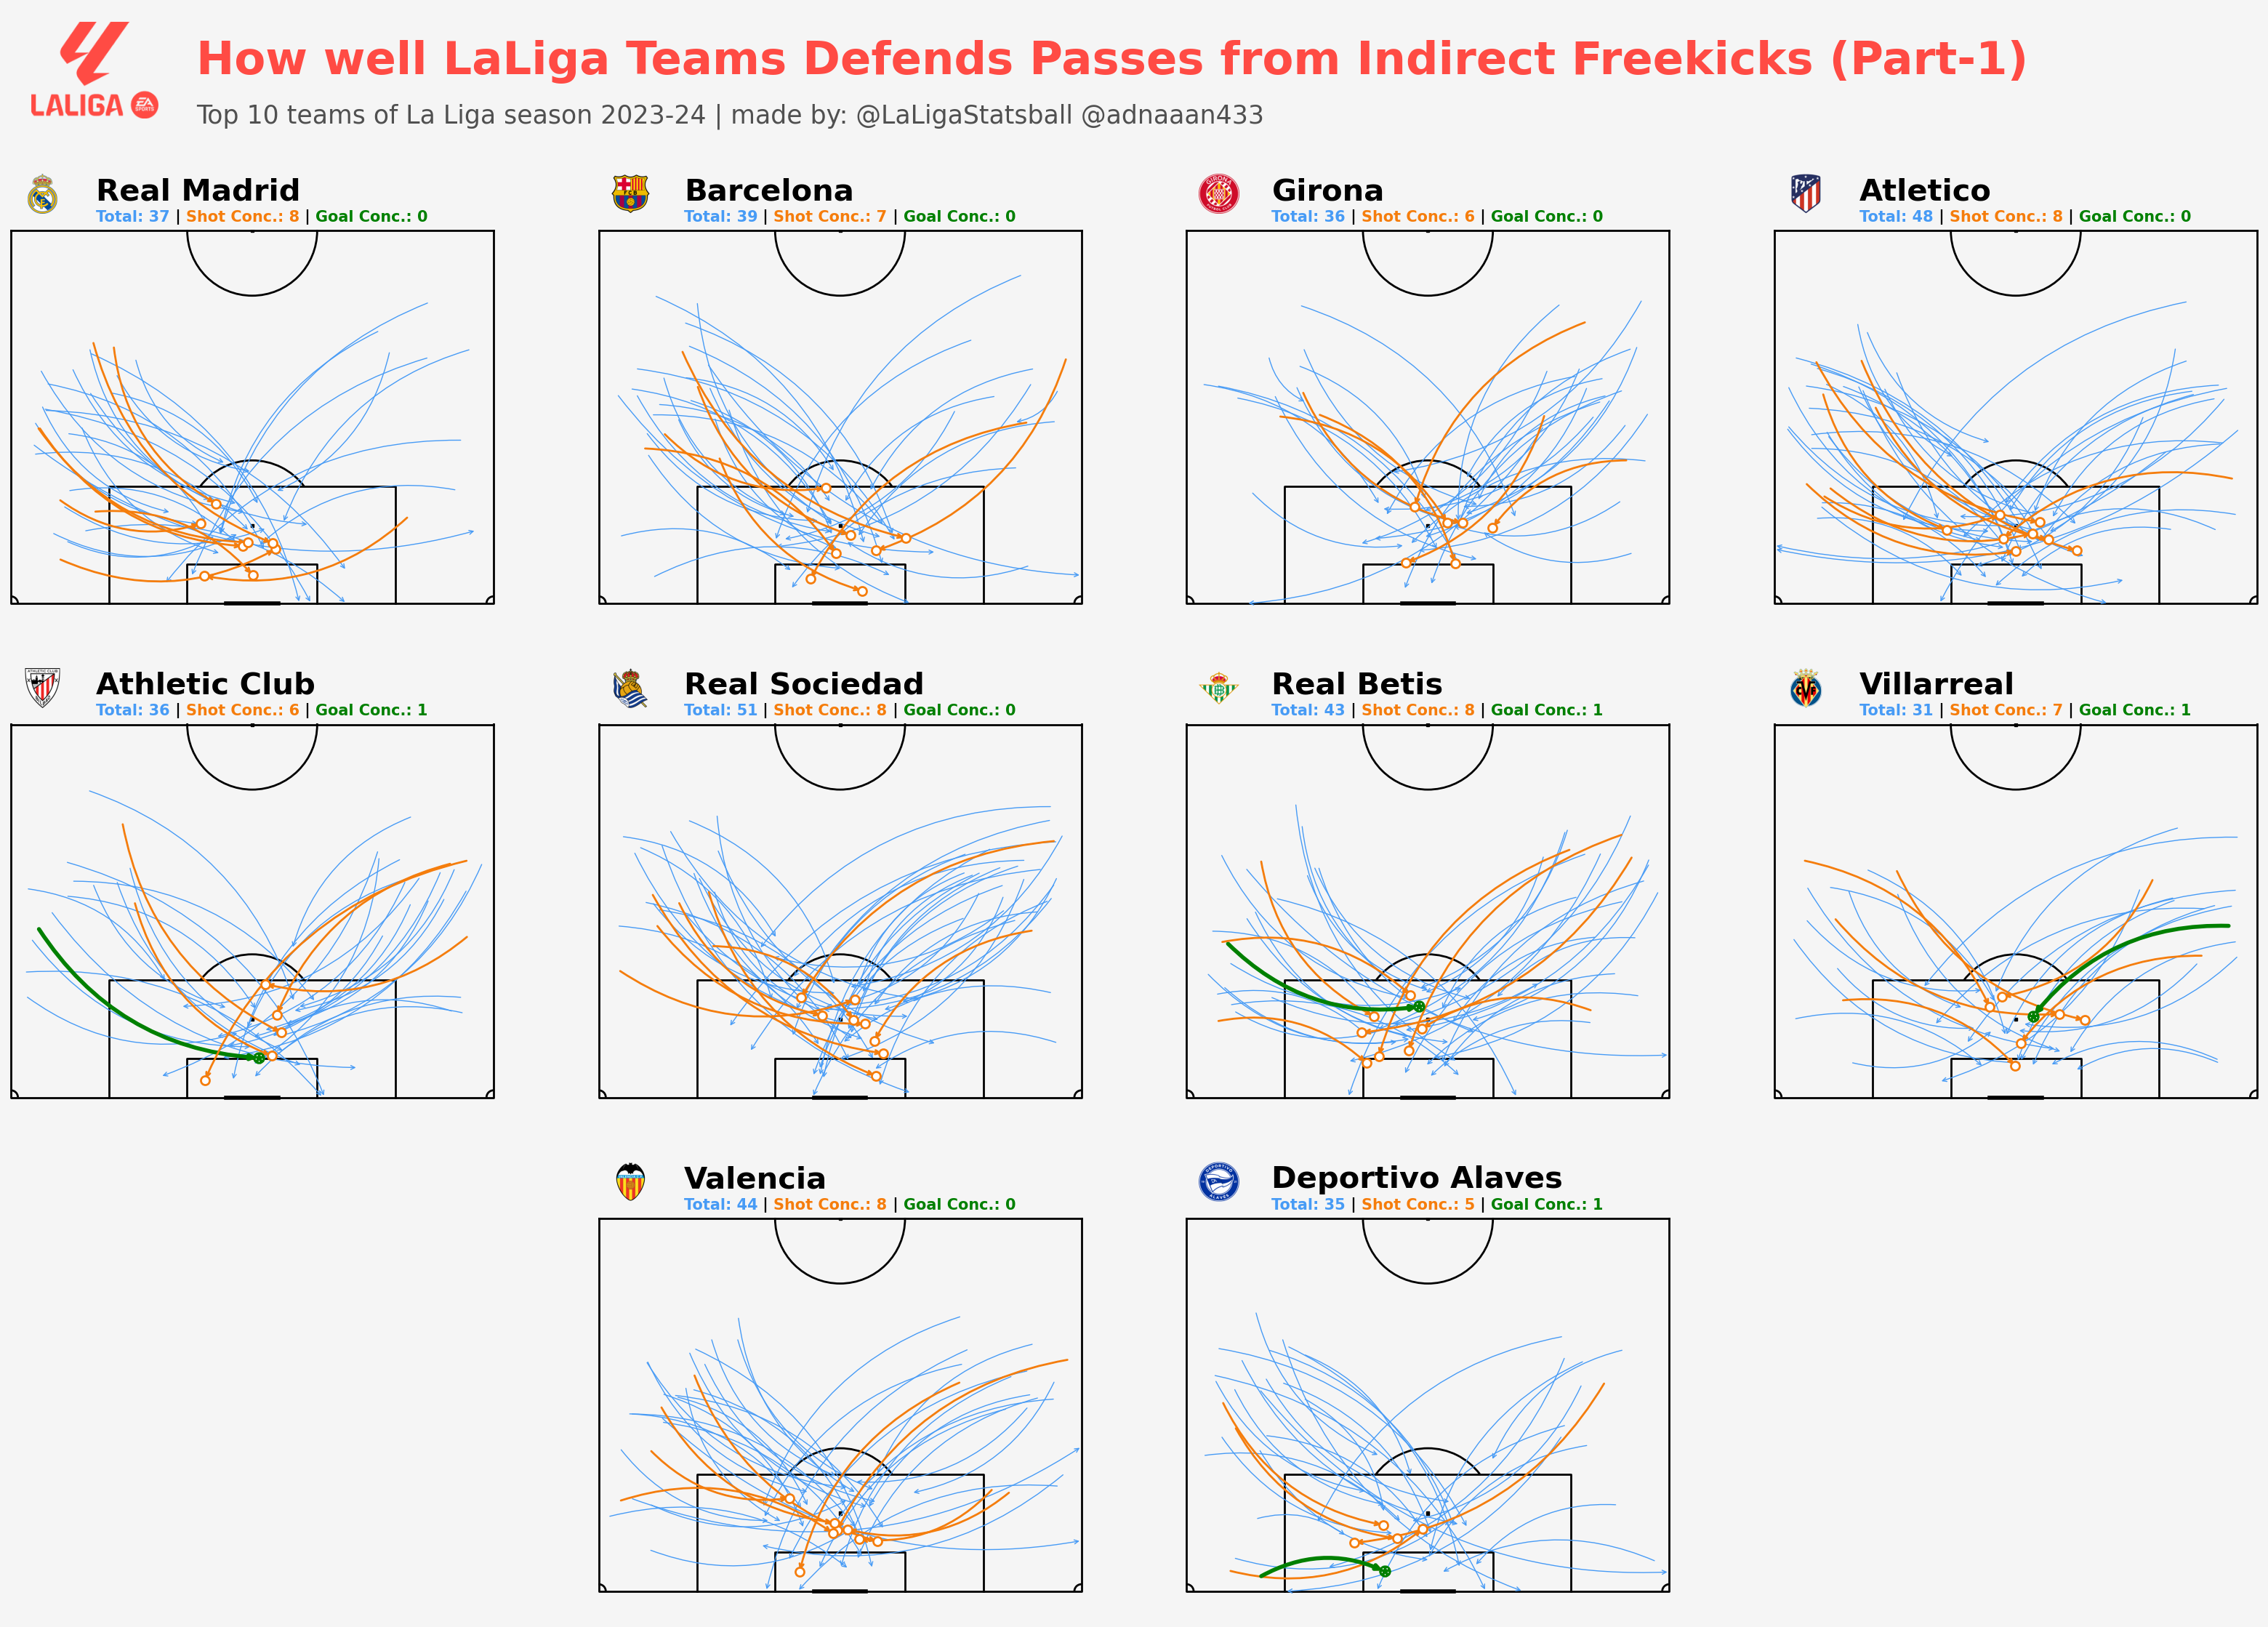

In [131]:
start_time = time.time()
fig, axs = plt.subplots(3, 4, figsize=(40, 25), facecolor='#f5f5f5', dpi=100)
axs = axs.flatten()

# List of team names
team_names = ['Real Madrid', 'Barcelona', 'Girona', 'Atletico', 'Athletic Club', 'Real Sociedad', 'Real Betis', 'Villarreal']

for i, team_name in enumerate(team_names):
    plot_indirect_freekick_against(axs[i], team_name)

plot_blank(axs[8])
plot_indirect_freekick_against(axs[9], 'Valencia')
plot_indirect_freekick_against(axs[10], 'Deportivo Alaves')
plot_blank(axs[11])

fig.text(0.19, 0.97, 'How well LaLiga Teams Defends Passes from Indirect Freekicks (Part-1)', color='#ff4b44', fontweight='bold', fontsize=45, ha='left', va='center')
fig.text(0.19, 0.94, 'Top 10 teams of La Liga season 2023-24 | made by: @LaLigaStatsball @adnaaan433', color='#505050', fontsize=25, ha='left', va='center')

image_url = 'https://raw.githubusercontent.com/adnaaan433/league_logos/main/LaLiga.png'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.12, bottom=0.93, width=0.07, height=0.07)



# plt.tight_layout()
end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")

Execution Time: 21.0223286151886 seconds


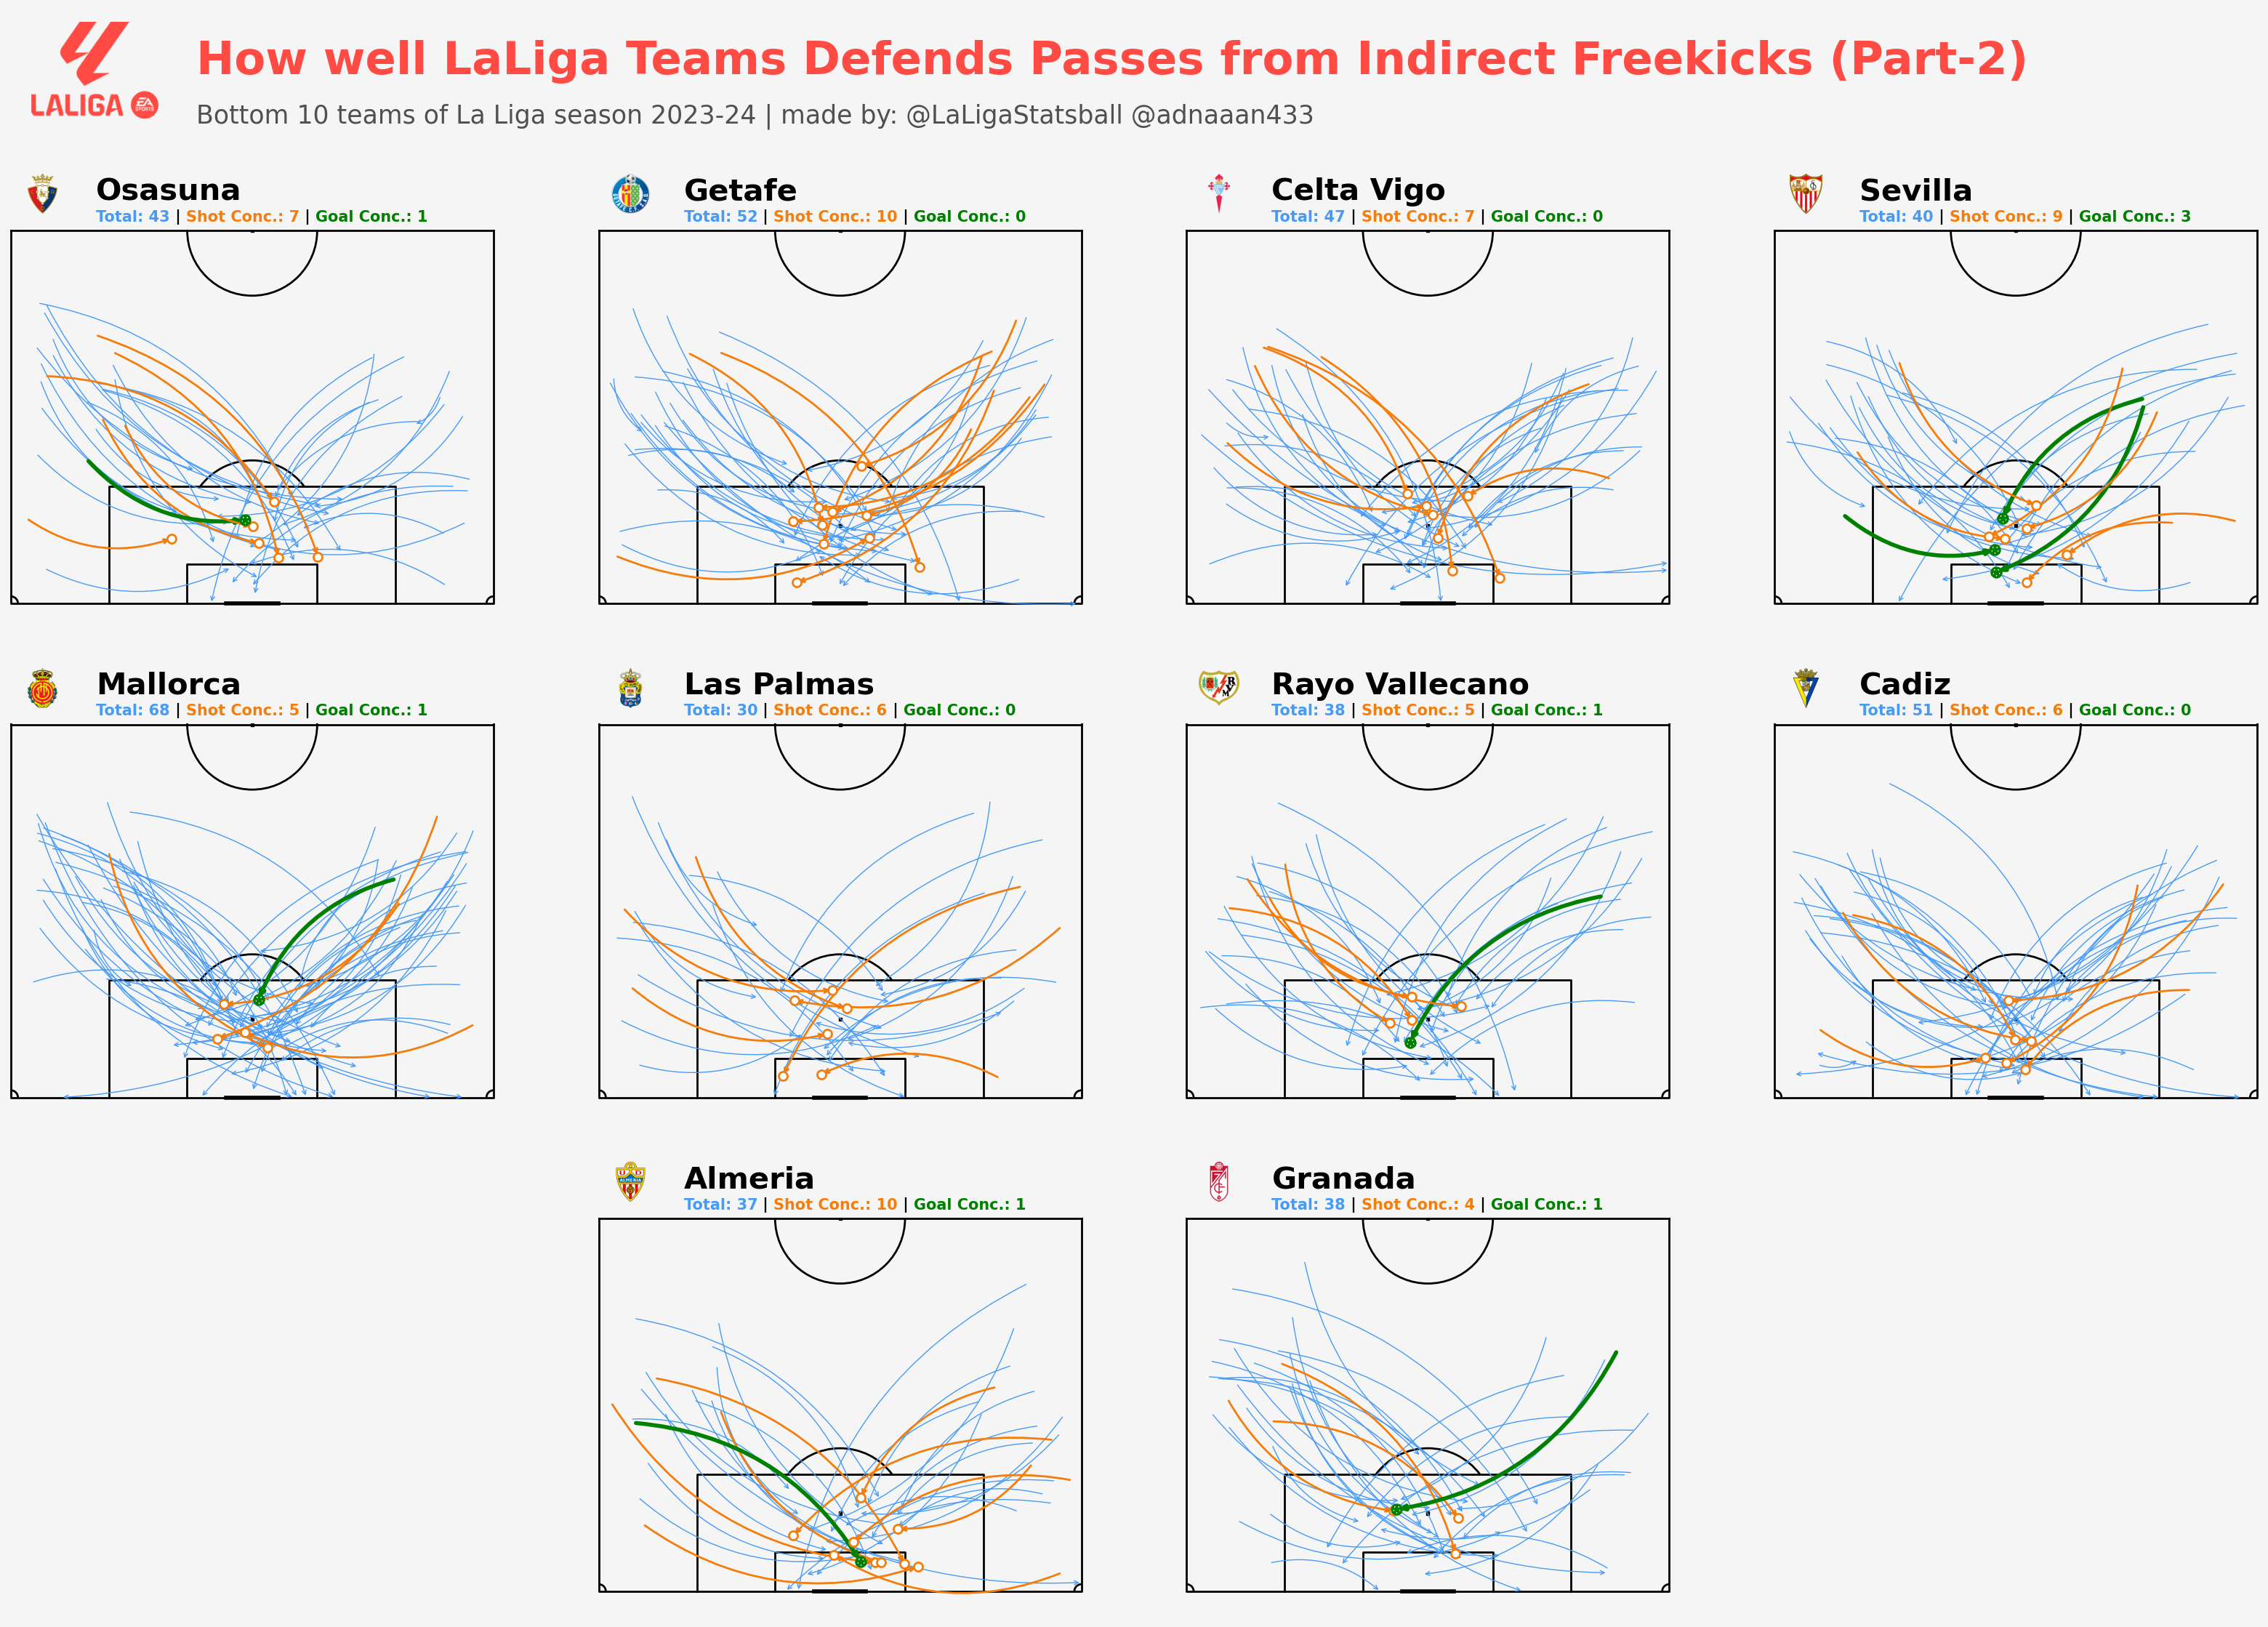

In [132]:
start_time = time.time()
fig, axs = plt.subplots(3, 4, figsize=(40, 25), facecolor='#f5f5f5', dpi=100)
axs = axs.flatten()

# List of team names
team_names = ['Osasuna', 'Getafe', 'Celta Vigo', 'Sevilla', 'Mallorca', 'Las Palmas', 
              'Rayo Vallecano', 'Cadiz']

for i, team_name in enumerate(team_names):
    plot_indirect_freekick_against(axs[i], team_name)

plot_blank(axs[8])
plot_indirect_freekick_against(axs[9], 'Almeria')
plot_indirect_freekick_against(axs[10], 'Granada')
plot_blank(axs[11])

fig.text(0.19, 0.97, 'How well LaLiga Teams Defends Passes from Indirect Freekicks (Part-2)', color='#ff4b44', fontweight='bold', fontsize=45, ha='left', va='center')
fig.text(0.19, 0.94, 'Bottom 10 teams of La Liga season 2023-24 | made by: @LaLigaStatsball @adnaaan433', color='#505050', fontsize=25, ha='left', va='center')

image_url = 'https://raw.githubusercontent.com/adnaaan433/league_logos/main/LaLiga.png'
image = urlopen(image_url)
image = Image.open(image)
ax_image = add_image(image, fig, left=0.12, bottom=0.93, width=0.07, height=0.07)



# plt.tight_layout()
end_time = time.time()
execution_time = end_time - start_time

print(f"Execution Time: {execution_time} seconds")